# Vehicle Insurance Fraud Detection Model
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
data = pd.read_csv("fraud_oracle.csv")

In [3]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Columns details:

* **Month**: The month in which the insurance claim was made.
* **WeekOfMonth**: The week of the month in which the insurance claim was made.
* **DayOfWeek**: The day of the week on which the insurance claim was made. 
* **Make**: The manufacturer of the vehicle involved in the claim. 
* **AccidentArea**: The area where the accident occurred (e.g., urban, rural).
* **DayOfWeekClaimed**: The day of the week on which the insurance claim was processed. 
* **MonthClaimed**: The month in which the insurance claim was processed.
* **WeekOfMonthClaimed**: The week of the month in which the insurance claim was processed. 
* **Sex**: The gender of the policyholder.
* **MaritalStatus**: The material status of the policyholder. 
* **Age**: The age of the policyholder.
* **Fault**: Indicates whether the policyholder was at fault in the accident.
* **PolicyType**: The type of insurance policy (e.g., comprehensive, third-party).
* **VehicleCategory**: The category of the vehicle (e.g., sedan, SUV).
* **VehiclePrice**: The price of vehicle.
* **FraudFound_P**: Indicates whether fraud was detected in the insurance claim.
* **PolicyNumber**: The unique identifier for the insurance policy.
* **RepNumber**: The unique identifier for the insurance representative handling the claim. 
* **Deductible**: The amount that the policy holder must pay out of pocket before the insurance company pays the remaining costs.
* **DriverRating**: The rating of the driver, often based on driving history or other factors.
* **Days_Policy_Accident**: The number of days since the policy was issued until the accident occurred.
* **Days_Policy_Claim**: The number of days since the policy was issued until the claim was made.
* **PastNumberOfClaims**: The number of claims previously made by the policyholder.
* **AgeOfVehicle**: The age of the vehicle involved in the claim.
* **AgeOfPolicyHolder**: The age of the policyholder.
* **PoliceReportFiled**: Indicates whether a police report was filed for the accident.
* **WitnessPresent**: Indicates whether a witness was present at the scene of the accident.
* **AgentType**: The type of insurance agent handling the policy (e.g., internal, external) 
* **NumberOfSuppliments**: The number of supplementary documents or claims related to the main claim, categorized into ranges.
* **AddressChange_Claim**: Indicates whether the address of the policyholder was changed at the time of the claim, categorized into ranges.
* **NumberOfCars**: The number of cars insured under the policy, categorized into ranges.
* **Year**: The year in which the claim was made or processed. 
* **BasePolicy**: The base policy type (e.g., Liability, Collision, All Perils). 

## Data Exploration

In [4]:
print("Dataset is about {} rows and {} columns .".format(data.shape[0],data.shape[1]))

Dataset is about 15420 rows and 33 columns .


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
data.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

Dataset contains **no missing values**

In [7]:
data.duplicated().sum()

0

Dataset contains **no dupicates rows**

## Descriptive Analysis

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


Here **Age** Columns has 0 minimum value (it should be an outlier or an error)

In [9]:
data.describe(include=object).T

,count,unique,top,freq
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,8,Monday,3757
MonthClaimed,15420,13,Jan,1446
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


- We can see that most of the **accident** held in **urban** Area.
- Most of the **male** involved in this case.
- **Policy holder** are more involve rather than third party.

**We will do more analysis of features through data visualization and EDA.**   

## -----------------------------------------Data Visualization--------------------------------------------------

- Data visualization on customers who are founded to do fraud to identify the important columns.

In [10]:
data_fraud = data[data["FraudFound_P"]==1]

In [11]:
data_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
53,Jul,4,Saturday,Honda,Urban,Wednesday,Aug,2,Male,Married,...,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
94,Nov,2,Thursday,Honda,Urban,Friday,Jan,3,Male,Single,...,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
96,Nov,2,Friday,Toyota,Urban,Tuesday,Jan,1,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision


In [12]:
gender_fraud = data_fraud["Sex"].value_counts()

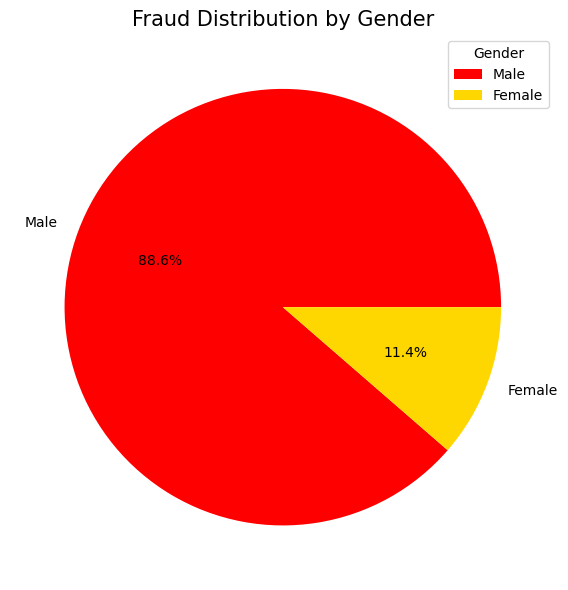

In [13]:
gender_fraud.plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6),colors =["red","gold"] )
plt.title('Fraud Distribution by Gender',fontsize=15)
plt.ylabel('')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

#### Above observation tell that **most of the Males** are involved in doing **fraud** about 88.6% as compared to Females.

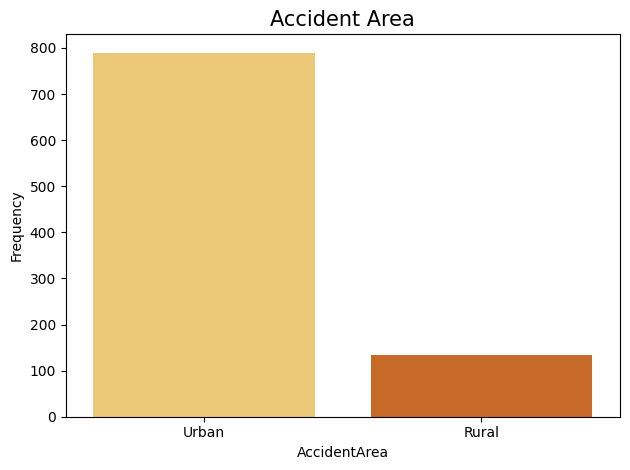

In [14]:
sns.countplot(x = "AccidentArea",data=data_fraud,palette="YlOrBr")
plt.title('Accident Area',fontsize=15)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### We can see that Most of the **Accident** helds in **Urban areas** , This implies that Fraud cases are founded in Urban Cities.  

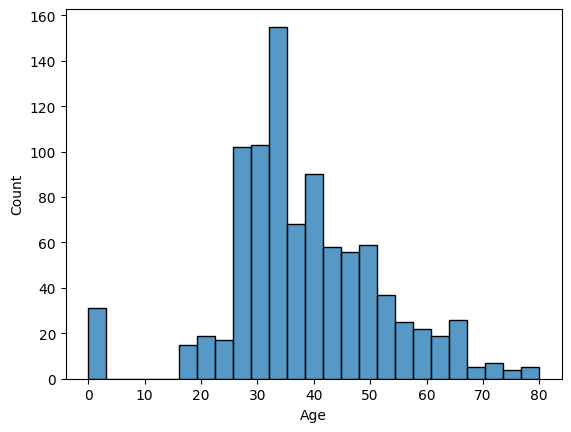

In [15]:
sns.histplot(x = "Age" ,data= data_fraud)
plt.show()

#### Let see the Data where age is less than 15 years.

In [16]:
minor_age = data_fraud["Age"]<=15

In [17]:
minor_age.value_counts()

Age
False    892
True      31
Name: count, dtype: int64

In [18]:
data = data[data["Age"]>15]

In [19]:
data_fraud = data[data["FraudFound_P"]==1]

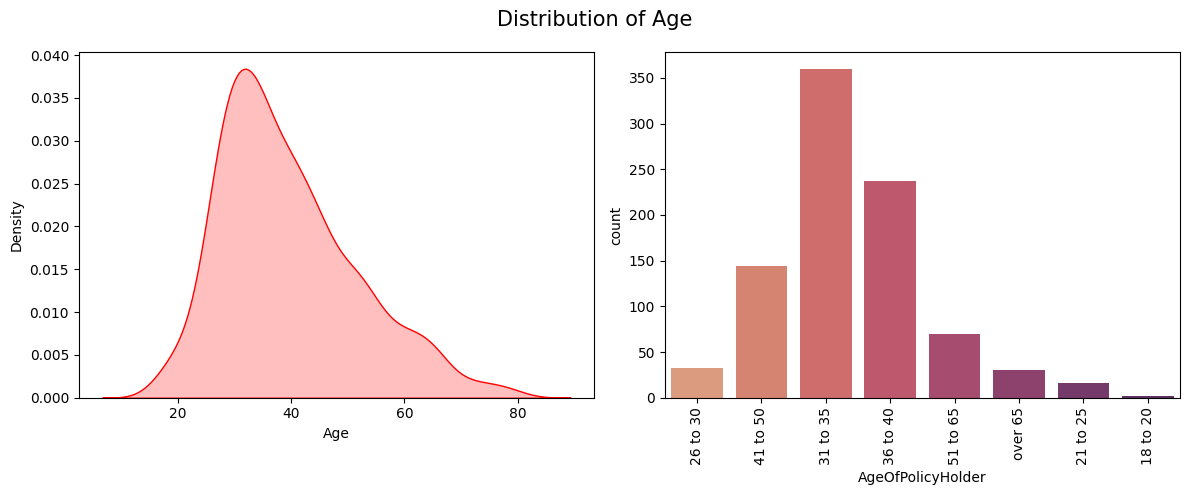

In [20]:
plt.figure(figsize=((12,5)))
plt.subplot(1,2,1)
sns.kdeplot(x = "Age",data=data_fraud,color="red",fill=True)
plt.suptitle("Distribution of Age",fontsize = 15)
plt.subplot(1,2,2)
sns.countplot(x = "AgeOfPolicyHolder" ,data = data_fraud,palette="flare")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

####  Fraud is most frequently detected among age between 30 to 40 . This indicates that teenagers and retired seniors are founded in doing fraud.

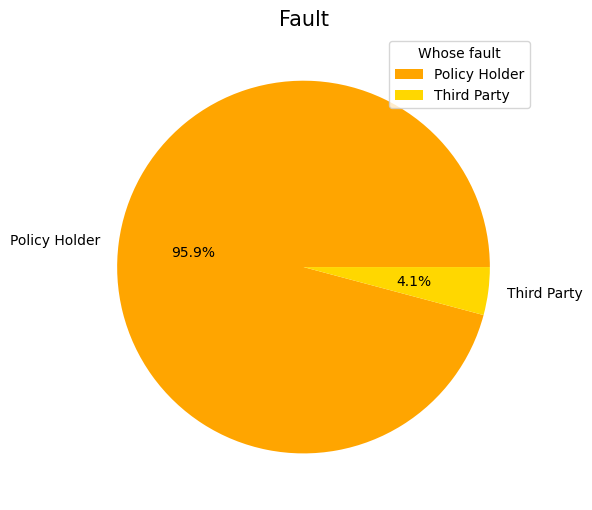

In [21]:
whose_fault = data_fraud['Fault'].value_counts()
whose_fault.plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6),colors =["orange","gold"] )
plt.title('Fault',fontsize=15)
plt.ylabel('')
plt.legend(title='Whose fault', loc='upper right')
plt.tight_layout()
plt.show()

#### 96% of Accident fault is founded to be Policy Holder itself. This indicates that most of the accident are done by Policy Holder.

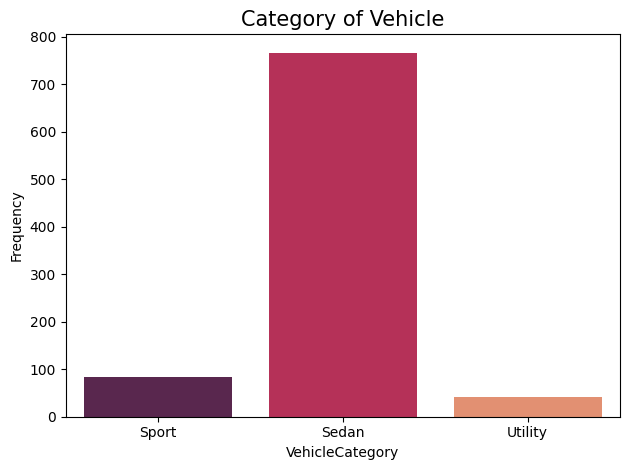

In [22]:
sns.countplot(x = "VehicleCategory" ,data = data_fraud,palette="rocket")
plt.title("Category of Vehicle",fontsize = 15)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### It shows that most of the fraud cases are founded in Sedan vehicle Category .

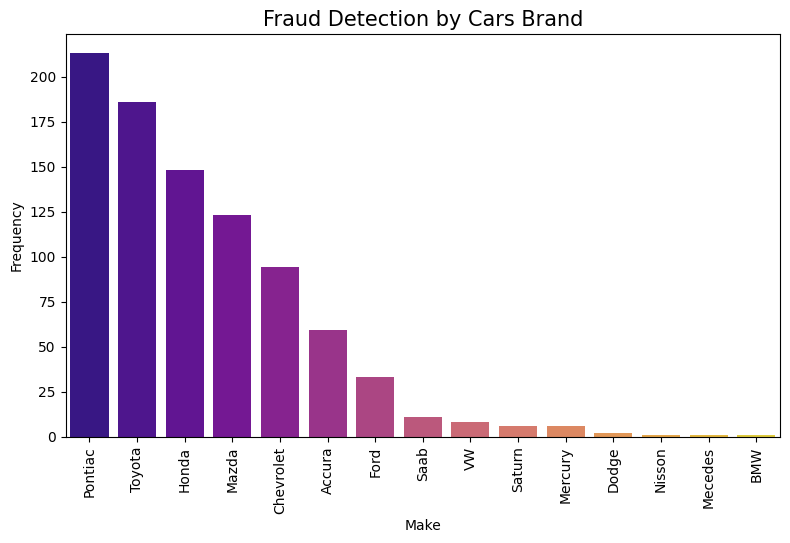

In [23]:
plt.figure(figsize=((8,5)))
car_makers = data_fraud["Make"].value_counts().index
sns.countplot(x = "Make",data=data_fraud,order=car_makers,palette="plasma")
plt.title("Fraud Detection by Cars Brand",fontsize = 15)
plt.tight_layout()
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()

#### This indicates that mostly fraud are done on Pontiac,Toyota,Honda,Mazda,Chevrolet cars as they are affordable to buy .
- This also show that teenagers are mostly attracted to these cars as they are easy to get .
- Big Brand cars like BMW,Mercedes,Dodge are not founded to be fraud .

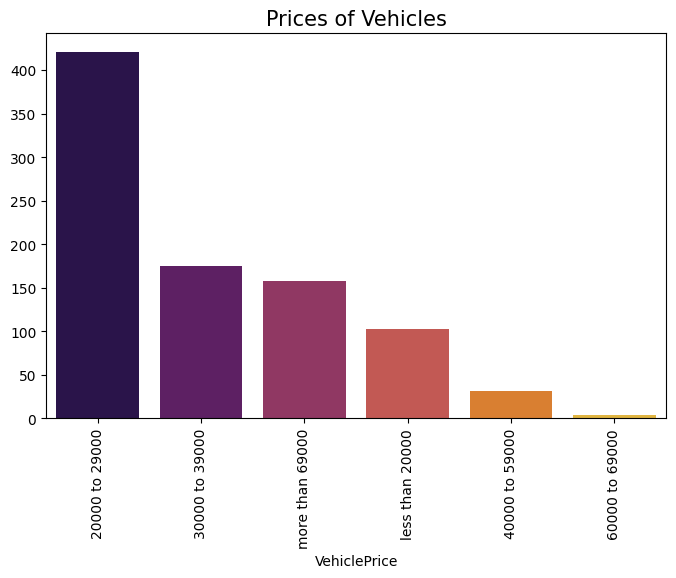

In [24]:
plt.figure(figsize=((8,5)))
price_veh = data_fraud["VehiclePrice"].value_counts()
sns.barplot(x = price_veh.index, y = price_veh.values,palette="inferno")
plt.title("Prices of Vehicles",fontsize = 15)
plt.xticks(rotation = 90)
# plt.tight_layout()
plt.show()

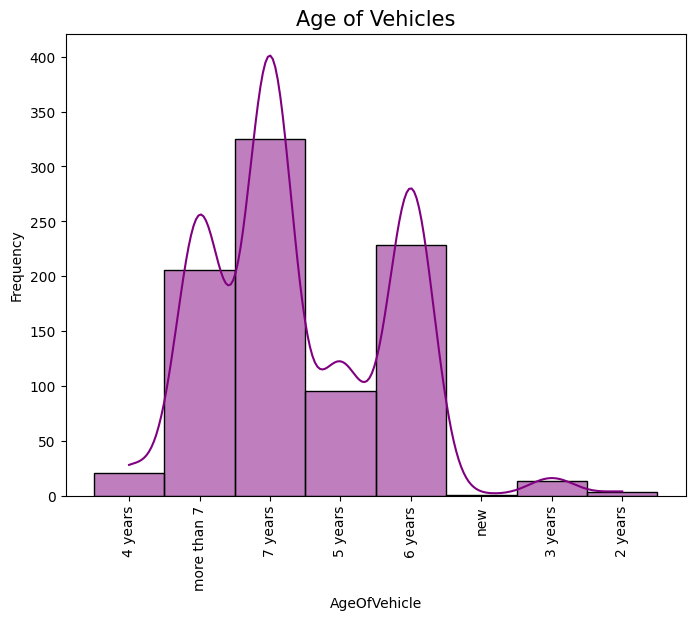

In [25]:
plt.figure(figsize=((8,6)))
sns.histplot(x = data_fraud["AgeOfVehicle"],kde=True,color="purple")
plt.title("Age of Vehicles",fontsize = 15)
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()

#### Vehicle age more than 5 years are founded to be fraud . 

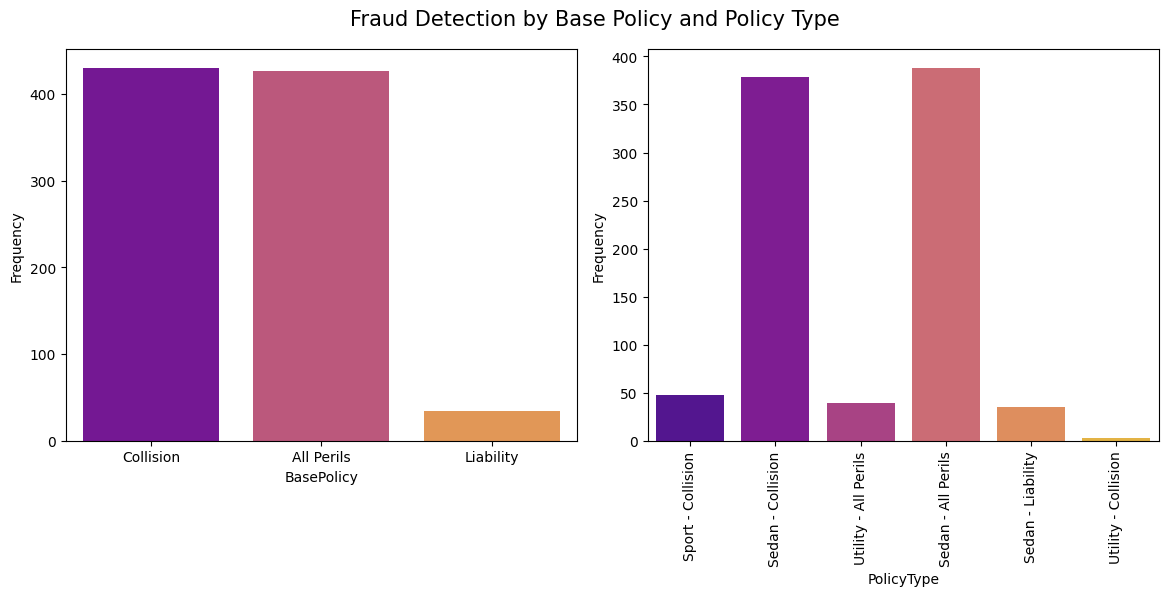

In [26]:
plt.figure(figsize=((12,5)))
plt.subplot(1,2,1)
plt.suptitle("Fraud Detection by Base Policy and Policy Type",fontsize = 15)
sns.countplot(x = "BasePolicy",data=data_fraud,palette="plasma")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
sns.countplot(x = "PolicyType",data=data_fraud,palette="plasma")
plt.tight_layout()
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()

#### Fraud cases were detected most frequently under the "All Perils" and "Collision" under sports and sedan category.

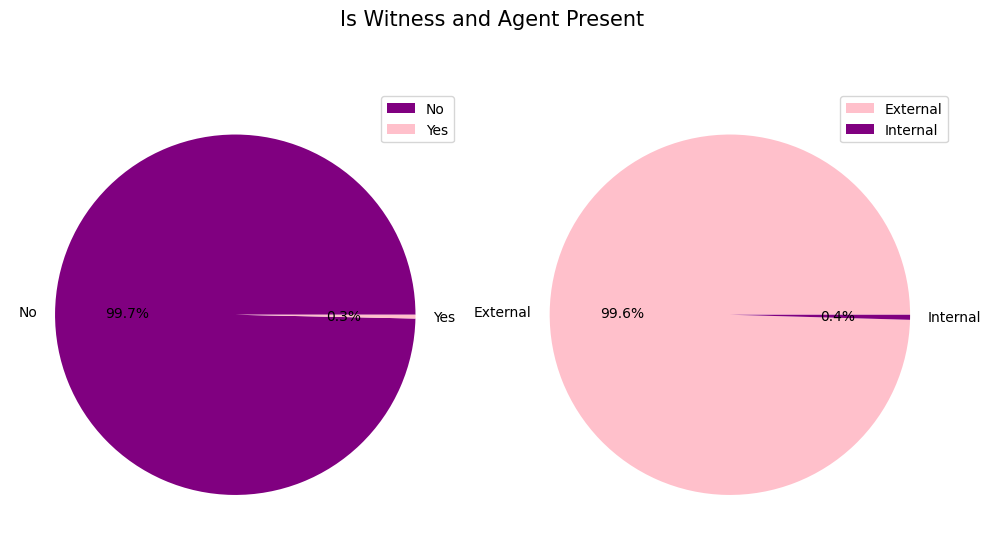

In [27]:
witness = data_fraud['WitnessPresent'].value_counts()
plt.figure(figsize=((10,6)))
plt.subplot(1,2,1)
witness.plot(kind="pie", autopct="%1.1f%%",colors =["purple","pink"] )
plt.suptitle('Is Witness and Agent Present ',fontsize=15)
plt.ylabel('')
plt.legend(loc='upper right')
plt.tight_layout()
plt.subplot(1,2,2)
agent = data_fraud["AgentType"].value_counts()
agent.plot(kind="pie", autopct="%1.1f%%",colors =["pink","purple"] )
plt.ylabel('')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#### It indicates that there is no witness was present at the scene of the accident and there is external agent involved in Fraud detection .

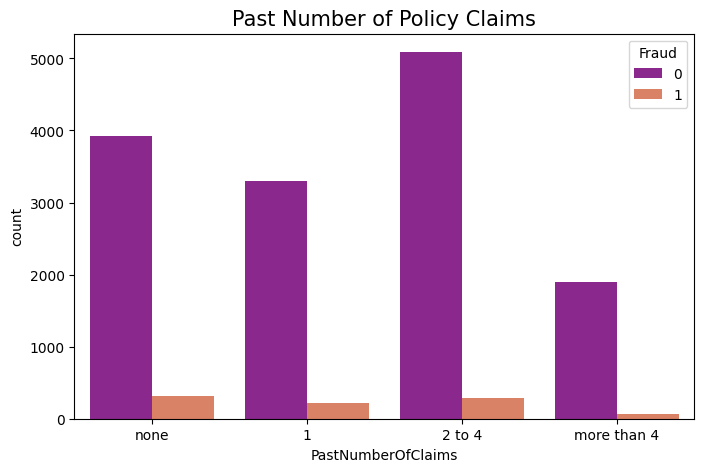

In [28]:
plt.figure(figsize=((8,5)))
sns.countplot(x = data["PastNumberOfClaims"],palette="plasma",hue = "FraudFound_P",data = data)
plt.title("Past Number of Policy Claims",fontsize = 15)
plt.legend(title = "Fraud")
plt.show()

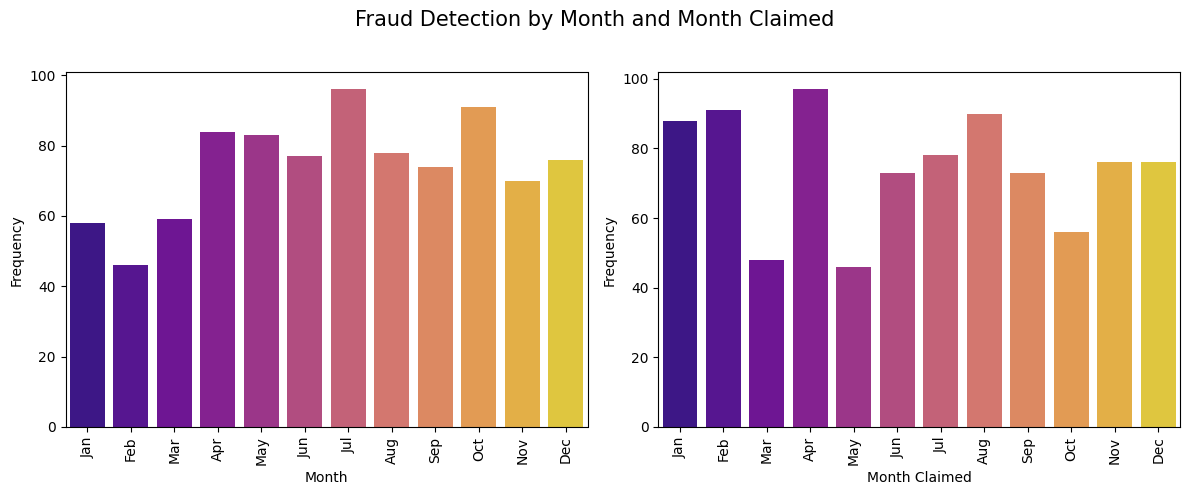

In [29]:
plt.figure(figsize=(12, 5))
plt.suptitle("Fraud Detection by Month and Month Claimed", fontsize=15)

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(x="Month", data=data_fraud, palette="plasma")
plt.ylabel("Frequency")
plt.xlabel("Month")
plt.xticks(rotation=90, ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x="MonthClaimed", data=data_fraud, palette="plasma")
plt.ylabel("Frequency")
plt.xlabel("Month Claimed")
plt.xticks(rotation=90, ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()

 #### This features have similar distributions

# Machine Learning Model Building

### As this is a classification problem we need to :
1. **Data Preprocessing**
- Encoding: Convert categorical variables to numerical using techniques like one-hot encoding.
- Scaling: Use StandardScaler or MinMaxScaler after encoding to scale features.
2. **Handling Imbalance**
- Over-sampling: Use techniques like SMOTE to balance the dataset.
3. **Train-Test Split**
- Split your data into training and testing sets using train_test_split.
4. **Model Selection**
- Choose various machine learning algorithms (e.g., Logistic Regression, Random Forest, SVM).
5. **Evaluation**
- Confusion Matrix: Visualize using confusion_matrix.
- Metrics: Calculate accuracy, precision, recall, and F1-score using classification_report.

## Selecting Important Columns

In [30]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [31]:
ml_data = data[['Month','AccidentArea','Sex','Age','MaritalStatus','Fault','Make','VehicleCategory','VehiclePrice',
                'AgeOfVehicle','PastNumberOfClaims','PoliceReportFiled','AgentType','PolicyType',
                "BasePolicy",'FraudFound_P']]

### Divide the data into Features and Target

In [32]:
X = ml_data.drop(columns="FraudFound_P")
y = ml_data["FraudFound_P"]

## Data Preprocessing

1. **Find the categorical and numerical columns**

In [33]:
cat_col = [i for i in X.columns if X[i].dtypes==object]
num_col = [i for i in X.columns if X[i].dtypes!=object]

2. **Import Column Transformer , Pipeline and Data Preprocessing Techniques**
- To make the Data preprocessing pipeline that perform data preprocessing steps for numeric and categorical features and for predicting new data

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col),
        ('cat', categorical_transformer, cat_col)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Month', 'AccidentArea', 'Sex',
                                  'MaritalStatus', 'Fault', 'Make',
                                  'VehicleCategory', 'VehiclePrice',
                                  'AgeOfVehicle', 'PastNumberOfClaims',
                                  'PoliceReportFiled', 'AgentType',
                                  'PolicyType', 'BasePolicy'])])

3. **Handling Imbalance (Over - sampling)**
- **Note -** Apply data preprocess steps to features (X) before using SMOTE


In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_preprocessed = preprocessor.fit_transform(X)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

## Divide the data into Train test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)

## Importing Ml Algorithm and Evaluation Techniques

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [38]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

results = {}
best_model = None
best_acc = 0.0

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy}

    if accuracy > best_acc:
        best_acc = accuracy
        best_model = clf
    
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}")
    print(classification_report(y_test, y_pred))

Results for Logistic Regression:
Accuracy: 0.77
Confusion Matrix :
[[1808 1060]
 [ 263 2553]]
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      2868
           1       0.71      0.91      0.79      2816

    accuracy                           0.77      5684
   macro avg       0.79      0.77      0.76      5684
weighted avg       0.79      0.77      0.76      5684

Results for K-Nearest Neighbors:
Accuracy: 0.85
Confusion Matrix :
[[1990  878]
 [   2 2814]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82      2868
           1       0.76      1.00      0.86      2816

    accuracy                           0.85      5684
   macro avg       0.88      0.85      0.84      5684
weighted avg       0.88      0.85      0.84      5684

Results for Decision Tree:
Accuracy: 0.94
Confusion Matrix :
[[2677  191]
 [ 155 2661]]
              precision    recall  f1-score   support

           0   

In [39]:
best_model

RandomForestClassifier()

## Lets predict with new random data

In [40]:
new_data = pd.DataFrame({
    'Month': ['Nov'],
    'AccidentArea': ['Urban'],
    'Sex': ['Male'],
    'Age': [35],
    'MaritalStatus': ['Married'],
    'Fault': ['Policy Holder'],
    'Make': ['Toyota'],
    'VehicleCategory': ['Sedan'],
    'VehiclePrice': ['20000 to 29000'],
    'AgeOfVehicle': ['6 years'],
    'PastNumberOfClaims': ['2 to 4'],
    'PoliceReportFiled': ['No'],
    'AgentType': ['External'],
    'PolicyType': ['Sedan - Collision'],
    'BasePolicy': ['Collision']
})

In [41]:
new_data_preprocessed = preprocessor.transform(new_data)

In [42]:
prediction = best_model.predict(new_data_preprocessed)
if prediction[0] == 1:
    print("This Person is founded to do Fraud")
else:
    print("This Person is not founded to do Fraud")  

This Person is founded to do Fraud


In [43]:
def predict_fraud(Month, AccidentArea, Sex, Age, MaritalStatus, Fault, Make, 
                  VehicleCategory, VehiclePrice, AgeOfVehicle, PastNumberOfClaims, PoliceReportFiled, 
                  AgentType, PolicyType, BasePolicy):
    new_data = pd.DataFrame({
        'Month': [Month],
        'AccidentArea': [AccidentArea],
        'Sex': [Sex],
        'Age': [Age],
        'MaritalStatus': [MaritalStatus],
        'Fault': [Fault],
        'Make': [Make],
        'VehicleCategory': [VehicleCategory],
        'VehiclePrice': [VehiclePrice],
        'AgeOfVehicle': [AgeOfVehicle],
        'PastNumberOfClaims': [PastNumberOfClaims],
        'PoliceReportFiled': [PoliceReportFiled],
        'AgentType': [AgentType],
        'PolicyType': [PolicyType],
        'BasePolicy': [BasePolicy]
    })

    # Preprocess the new data
    new_data_preprocessed = preprocessor.transform(new_data)

    # Predict using the best model
    prediction = best_model.predict(new_data_preprocessed)
    
    if prediction[0] == 1:
        return "This Person is found to do Fraud"
    else:
        return "This Person is not found to do Fraud"

In [44]:
import pickle
# with open("preprocessor.pkl","wb") as preprocessor_file:
#     pickle.dump(preprocessor,preprocessor_file)
# with open("model.pkl","wb") as model:  
#     pickle.dump(best_model,model)    

In [45]:
ml_data.to_csv('ml_data.csv', index=False)